#Storytelling
##Descrpición:
### 1. Trabajar creando gráficos que expliquen las siguientes dimensiones:
- Carrera \
- Edad \
- Género \
- Localidad

### 2. Realizar un comparativo de inscripciones entre ambas universidades

###3. Analizar la correlación de variables, entre:
- Carrera
- Edad
- Genero
- Localidad



In [69]:
import requests
import datetime
import csv
import os
from pathlib import Path
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#dir=os.getcwd()

#UN_BA = pd.read_csv (f'{dir}/GHUNBuenosAires_process.txt', delimiter="\t")
#UN_DC = pd.read_csv (f'{dir}/GHUNDelcine_process.txt', delimiter="\t")
UN_BA = pd.read_csv ('usr/local/airflow/datasets/GHUNBuenosAires_process.txt', delimiter="\t")
UN_DC = pd.read_csv ('usr/local/airflow/datasets/GHUNDelcine_process.txt', delimiter="\t")
datos_t = pd.concat([UN_BA, UN_DC])

datos_t.tail()
#UN_BA.head()
#UN_DC.head()

,ID,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email
344,2007,universidad del cine,farmacia,2020-09-15,brooke,johnson,female,51,8345,alumine,eduardoward@yahoo.com
345,2011,universidad del cine,bioquímica,2020-11-08,david,ortiz,female,27,4616,barcena,ymorrow@yahoo.com
346,2014,universidad del cine,licenciatura en musicoterapia,2020-10-12,kevin,byrd,female,16,1664,trujui,arnolddavid@hotmail.com
347,2033,universidad del cine,licenciatura en administración,2020-09-06,jill,kennedy,female,72,4234,achalco,emily74@gmail.com
348,2034,universidad del cine,licenciatura en ciencia y tecnología de alimentos,2020-10-19,ann,estrada,female,68,4186,cañete,lanetammie@gmail.com


##Estudiantes por carrera 

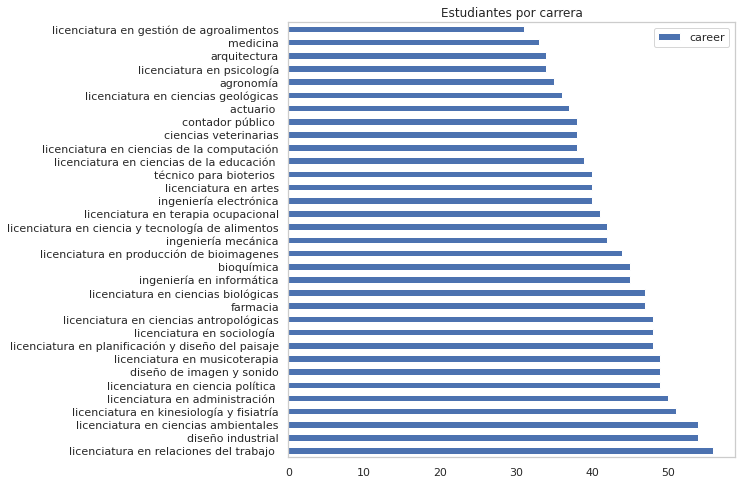

In [86]:
plt.figure(figsize=(8,8))
datos_t['career'].value_counts().plot(kind='barh', title='Estudiantes por carrera')
plt.grid()
plt.legend()

In [89]:
datos_t['career'].value_counts() / len(datos_t['career'])

licenciatura en relaciones del trabajo                0.039381
diseño industrial                                     0.037975
licenciatura en ciencias ambientales                  0.037975
licenciatura en kinesiología y fisiatría              0.035865
licenciatura en administración                        0.035162
licenciatura en ciencia política                      0.034459
diseño de imagen y sonido                             0.034459
licenciatura en musicoterapia                         0.034459
licenciatura en planificación y diseño del paisaje    0.033755
licenciatura en sociología                            0.033755
licenciatura en ciencias antropológicas               0.033755
farmacia                                              0.033052
licenciatura en ciencias biológicas                   0.033052
ingeniería en informática                             0.031646
bioquímica                                            0.031646
licenciatura en producción de bioimagenes             0

#Estudiantes por edad

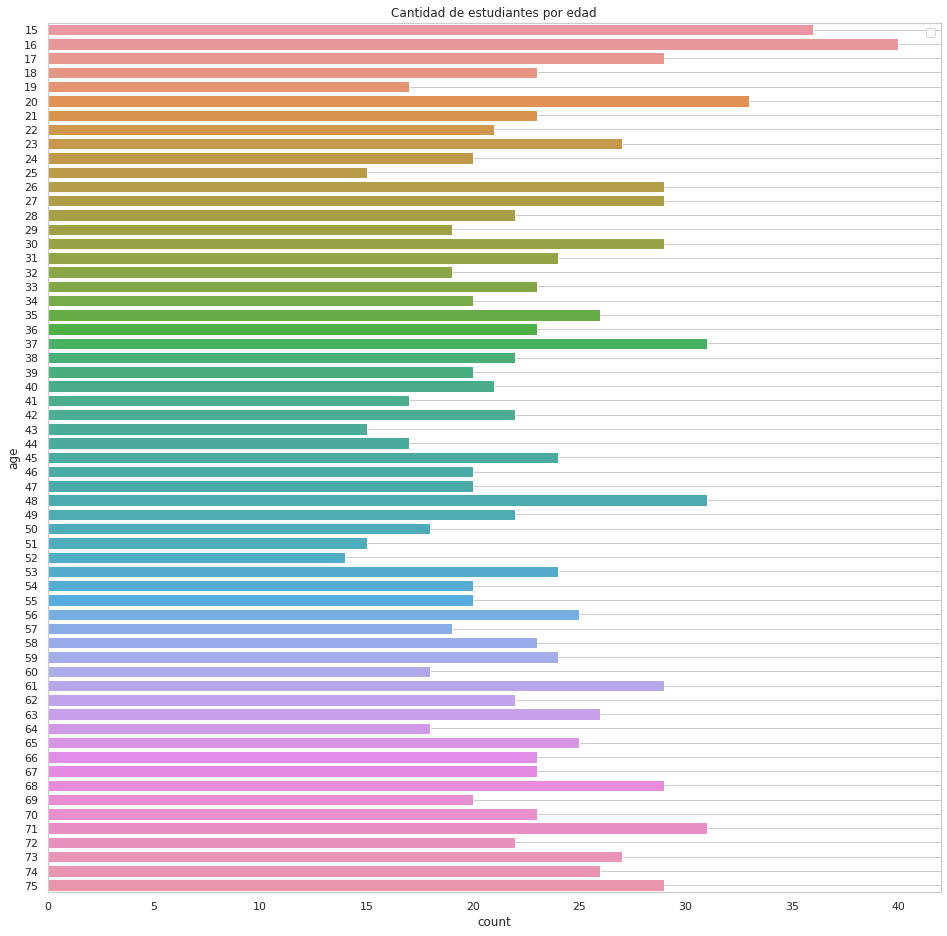

In [98]:
plt.figure(figsize=(16,16))
sns.countplot(data=datos_t, y='age').set(title="Cantidad de estudiantes por edad")
#datos_t['age'].value_counts().plot(kind='bar', title='Estudiantes por edad')
plt.grid()
plt.legend()

#Porcentaje de estudiantes por género

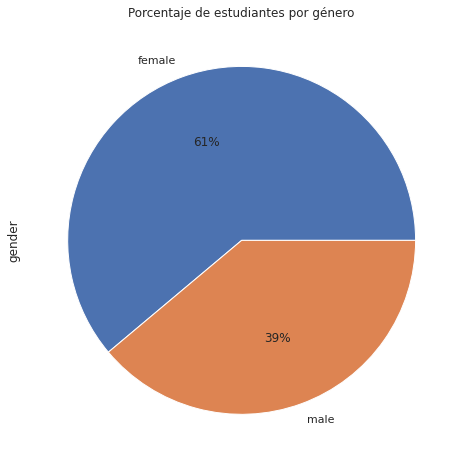

In [74]:
plt.figure(figsize=(8,8))
datos_t['gender'].value_counts().plot(kind='pie',autopct='%1.0f%%', title='Porcentaje de estudiantes por género')

#Estudiantes por localidad

[Text(0.5, 1.0, 'Cantidad de estudiantes por localidad')]

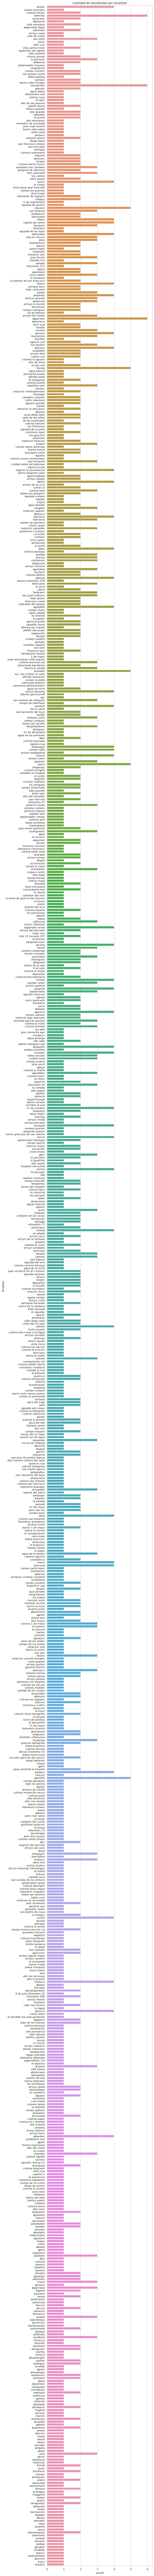

In [73]:
plt.figure(figsize=(8,200))
sns.countplot(data=datos_t, y='location').set(title="Cantidad de estudiantes por localidad")

[Text(0.5, 1.0, 'Cantidad de estudiantes por universidad')]

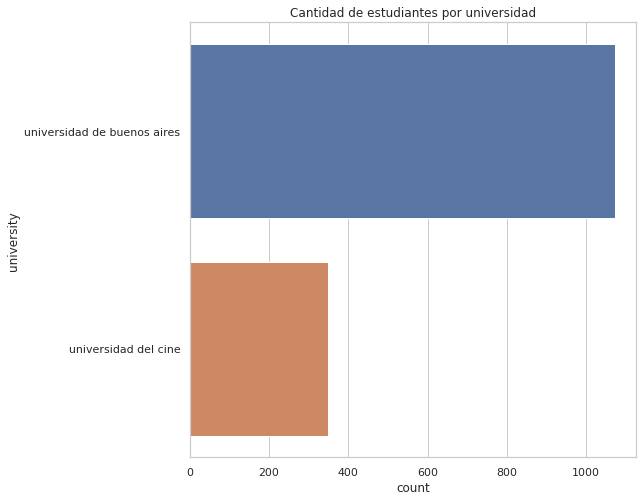

In [81]:
plt.figure(figsize=(8,8))
sns.countplot(data=datos_t, y='university').set(title="Cantidad de estudiantes por universidad")

In [83]:
stats = pd.DataFrame(datos_t, columns=['career', 'age', 'gender', 'location', 'university'])

stats['career']=stats['career'].astype('category').cat.codes
stats['gender']=stats['gender'].astype('category').cat.codes
stats['location']=stats['location'].astype('category').cat.codes
stats['university']=stats['university'].astype('category').cat.codes
corr_matrix = stats.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,career,age,gender,location,university
career,1.000000,0.025868,-0.025874,0.004217,0.015140
age,0.025868,1.000000,-0.033115,-0.002687,0.054823
gender,-0.025874,-0.033115,1.000000,0.051444,-0.454952
location,0.004217,-0.002687,0.051444,1.000000,-0.065425
university,0.015140,0.054823,-0.454952,-0.065425,1.000000


#CONCLUSIÓN

1. La carrera con más estudiantes inscritos en el periodo indicado es "Licenciatura en relaciones de trabajo"

2. Al comparar las edades de los estudiantes inscritos se puede apreciar que las personas de 15 y 16 años son las que más se inscribieron, sin embargo las edades son muy variadas y personas de todas las edades se inscribieron en dicho periodo

3. De todas las personas inscritas observamos que mayoritariamente la población es masculina, teniendo este un valor de 61% frente al 39% de mujeres

5. Al comparar los registros de inscripciones entre la Universidad de Buenos Aires y la Universidad Del Cine, gráficamente se aprecia una preferencia arrasante por la Universidad de Buenos Aires

6. De la matriz de correlación se puede concluir que la universidad elegida depende mayoritariamente por la edad de las personas a inscribirse y por las carreras ofertadas por cada universidad, notándose una mayor preferencia por la Universidad de Buenos Aires
